In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
URL = (r"C:\Users\mizai\clean_df.csv")

df=pd.read_csv(URL, index_col=[0])

In [67]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [68]:
#1. Regresión lineal y regresión lineal múltiple
'''
Regresión lineal

Un ejemplo de un modelo de datos que usaremos es:
Regresión lineal simple

La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

     El predictor/variable independiente (X)
     La respuesta/variable dependiente (que queremos predecir)(Y)

El resultado de la regresión lineal es una función lineal que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).

𝑌: 𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋: 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

Función lineal
                                            𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
                                    O       Yhat = b0 + b1*X     

     a se refiere a la intersección de la línea de regresión, en otras palabras: el valor de Y cuando X es 0
     b se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad


'''


'\nRegresión lineal\n\nUn ejemplo de un modelo de datos que usaremos es:\nRegresión lineal simple\n\nLa regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:\n\n     El predictor/variable independiente (X)\n     La respuesta/variable dependiente (que queremos predecir)(Y)\n\nEl resultado de la regresión lineal es una función lineal que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).\n\n𝑌: 𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋: 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠\n\nFunción lineal\n                                            𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋\n                                    O       Yhat = b0 + b1*X     \n\n     a se refiere a la intersección de la línea de regresión, en otras palabras: el valor de Y cuando X es 0\n     b se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad\n\n\n'

In [69]:
#Carguemos los módulos para la regresión lineal:
from sklearn.linear_model import LinearRegression

In [70]:
#Creamos el objeto  de la regresion lineal
lm = LinearRegression()
lm

LinearRegression()

In [71]:
'''
¿Cómo podría "autopista-L/100km"  (highway-L/100km) ayudarnos a predecir el precio (price) del automóvil?

Para este ejemplo, queremos ver cómo Highway-L/100km puede ayudarnos a predecir el precio del automóvil. 
Usando una regresión lineal simple, crearemos una función lineal con "L/100km en carretera" como la variable predictora 
y el "precio" como la variable de respuesta.
'''

'\n¿Cómo podría "autopista-L/100km"  (highway-L/100km) ayudarnos a predecir el precio (price) del automóvil?\n\nPara este ejemplo, queremos ver cómo Highway-L/100km puede ayudarnos a predecir el precio del automóvil. \nUsando una regresión lineal simple, crearemos una función lineal con "L/100km en carretera" como la variable predictora \ny el "precio" como la variable de respuesta.\n'

In [72]:
X = df[['highway-L/100km']]
Y = df['price']

In [73]:
#Ajuste el modelo lineal usando Highway-L/100km:
lm.fit(X,Y)

LinearRegression()

In [74]:
#Podemos generar una predicción:
Yhat=lm.predict(X)
Yhat[0:5]   

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [75]:
#cual es el valor del intercepto (a)
lm.intercept_

-14617.843054664594

In [76]:
#cual es el valor de la pendiente (b)
lm.coef_

array([3458.68511314])

In [77]:
"""
¿Cuál es el modelo lineal estimado final que obtenemos?

Como vimos arriba, deberíamos obtener un modelo lineal final con la estructura:

𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋

Conectando los valores reales obtenemos:

Precio = -14617.84 + 3458.68 x L/100km en carretera
"""

'\n¿Cuál es el modelo lineal estimado final que obtenemos?\n\nComo vimos arriba, deberíamos obtener un modelo lineal final con la estructura:\n\n𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋\n\nConectando los valores reales obtenemos:\n\nPrecio = -14617.84 + 3458.68 x L/100km en carretera\n'

In [78]:
#¿Entrenar el modelo utilizando "engine-size" como variable independiente y "price" como variable dependiente?


X= df[["engine-size"]]
Y= df["price"]
lm1= LinearRegression ()


lm1.fit(X,Y)

LinearRegression()

In [79]:
Yhat = lm1.predict(X)

In [80]:
lm1.intercept_

-7963.338906281049

In [81]:
lm1.coef_

array([166.86001569])

In [82]:
#otra forma de crear una regresion lineal, agregando las variables independiente y dependiente.

lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [83]:
"""Yhat = -7963.338906281049 + 166.86001569 * X
   price =  -7963.338906281049 + 166.86001569 * engine-size
   
   Yhat = price
"""
#predictor de precio para el tamaño de motos vs price

'Yhat = -7963.338906281049 + 166.86001569 * X\n   price =  -7963.338906281049 + 166.86001569 * engine-size\n   \n   Yhat = price\n'

Regresion lineal multiple variables.

¿Qué pasa si queremos predecir el precio del automóvil usando más de una variable?

Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar la regresión lineal múltiple. La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes). La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero:

                                    𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒
                                    𝑋_1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1
                                    𝑋_2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2
                                    𝑋_3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3
                                    𝑋_4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4

                                    𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡
                                    𝑏_1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1
                                    𝑏_2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2
                                    𝑏_3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3
                                    𝑏_4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4

La ecuación está dada por:

        𝑌ℎ𝑎𝑡=𝑎+𝑏_1𝑋_1+𝑏_2𝑋_2+𝑏_3𝑋_3+𝑏_4𝑋_4
        

Del apartado anterior sabemos que otros buenos predictores de precio podrían ser:

    Horsepower   (Caballo de fuerza)
    Curb-weight   (peso en vacio)
    Engine-size   (tamaño de la maquina)
    Highway-L/100km   (autopista- L/100km)
                   
Desarrollemos un modelo usando estas variables como variables predictoras.

In [84]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

Ajuste el modelo lineal utilizando las cuatro variables mencionadas anteriormente.

In [85]:
lm.fit(Z, df['price'])

LinearRegression()

¿Cuál es el valor del intercepto(a)?

In [86]:
lm.intercept_

-14385.634549360107

¿Cuáles son los valores de los coeficientes (b1, b2, b3, b4)?

In [87]:
lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

¿Cuál es el modelo lineal estimado final que obtenemos?
Como vimos arriba, deberíamos obtener una función lineal final con la estructura:
        𝑌ℎ𝑎𝑡=𝑎+𝑏_1𝑋_1+𝑏_2𝑋_2+𝑏_3𝑋_3+𝑏_4𝑋_4
        
¿Cuál es la función lineal que obtenemos en este ejemplo?

Price = -14385.634549360107 + 36.6377371 x horsepower + 3.50038215 x curb-weight + 85.37370862 x engine-size + 500.51979785 x highway-L/100km


Pregunta #2 a):
Cree y entrene un modelo de regresión lineal múltiple "lm2" en el que la variable de respuesta sea "precio" y la variable de predicción sea "pérdidas normalizadas" y "L/100km en carretera".

In [88]:
lm2= df[["normalized-losses","highway-L/100km"]]
lm.fit( lm2,df["price"] )

"""
tambien se puede plantear de la siguiente forma: 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-L/100km']],df['price'])
"""

"\ntambien se puede plantear de la siguiente forma: \nlm2 = LinearRegression()\nlm2.fit(df[['normalized-losses' , 'highway-L/100km']],df['price'])\n"

In [89]:
lm.intercept_

-14340.935762266614

In [90]:
lm.coef_

array([-2.86467994e+00,  3.46770737e+03])

Nuestro modelo predictivo con las variables "normalized-losses" y "highway-L/100km" se presenta de la siguiente forma:

price = -14340.935762266614 -2.86467994e+00 * normalized-losses + 3.46770737e+03 * highway-L/100km

2. Evaluación del modelo mediante visualización

Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y elegimos el mejor? Una forma de hacerlo es usando una visualización.
Importe el paquete de visualización, seaborn:

In [91]:
import seaborn as sns
%matplotlib inline 

Gráfico de regresión (plot)

Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante gráficos de regresión.

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que pasa por los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

Visualicemos carretera-L/100km como potencial variable predictora del precio:

(0.0, 47712.001957655266)

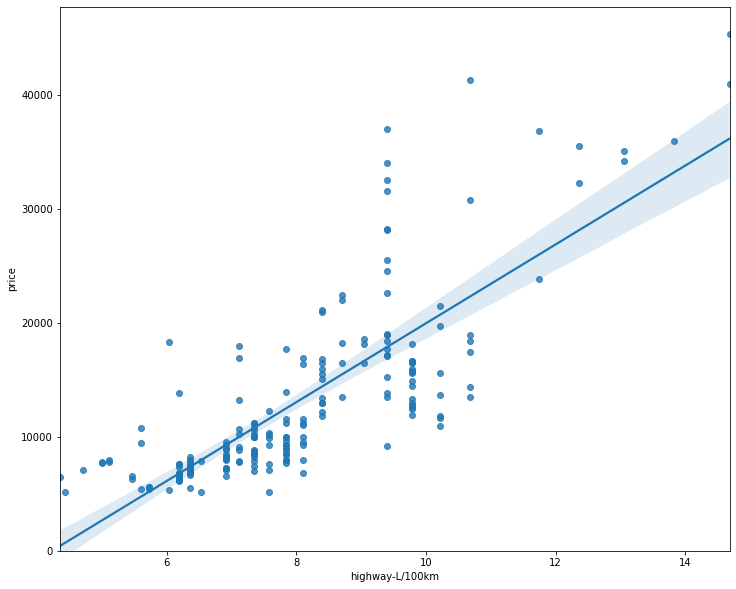

In [92]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)

Podemos ver en este gráfico que el precio está negativamente correlacionado con el L/100km ya que la pendiente de la regresion es negativa.

Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a cuán dispersos están los puntos de datos alrededor de la línea de regresión. Esto le dará una buena indicación de la variación de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado alejados de la línea, este modelo lineal podría no ser el mejor modelo para estos datos.

Comparemos este gráfico con el gráfico de regresión de "peak-rpm".

(0.0, 47414.1)

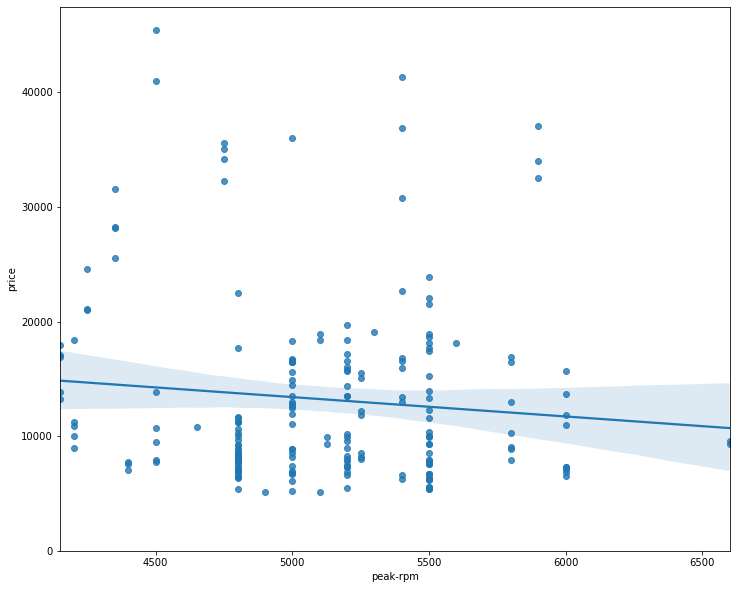

In [93]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Al comparar el gráfico de regresión de "rpm peak" y "L/100km en carretera", vemos que los puntos para "L/100km en carretera" están mucho más cerca de la línea generada y, en promedio, disminuyen. Los puntos de "rpm peak" están más dispersos alrededor de la línea predicha y es mucho más difícil determinar si los puntos disminuyen o aumentan a medida que aumenta el "rpm peak".

In [94]:
df[["peak-rpm","highway-L/100km","price"]].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017694,-0.101616
highway-L/100km,0.017694,1.000000,0.801118
price,-0.101616,0.801118,1.000000


#La variable "L/100km en carretera" tiene una correlación más fuerte con "precio", es aproximadamente 0.801118 en comparación con "rpm peak", que es aproximadamente -0.101616. Puedes verificarlo usando el siguiente comando

#nota del autor, originalmente estaba estudiado con la variable highway-mpg

       Residual Plot  (Parcela Residual)

Una buena manera de visualizar la varianza de los datos es usar una gráfica de residuos.

¿Qué es un residual?

La diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se llama residuo (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

Entonces, ¿qué es un gráfico residual?

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

¿A qué prestamos atención cuando miramos una parcela residual?

Nos fijamos en la dispersión de los residuos:

- Si los puntos en una gráfica de residuos se distribuyen aleatoriamente alrededor del eje x, entonces un modelo lineal es apropiado para los datos.

¿Porqué es eso? La distribución aleatoria de residuos significa que la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a estos datos.

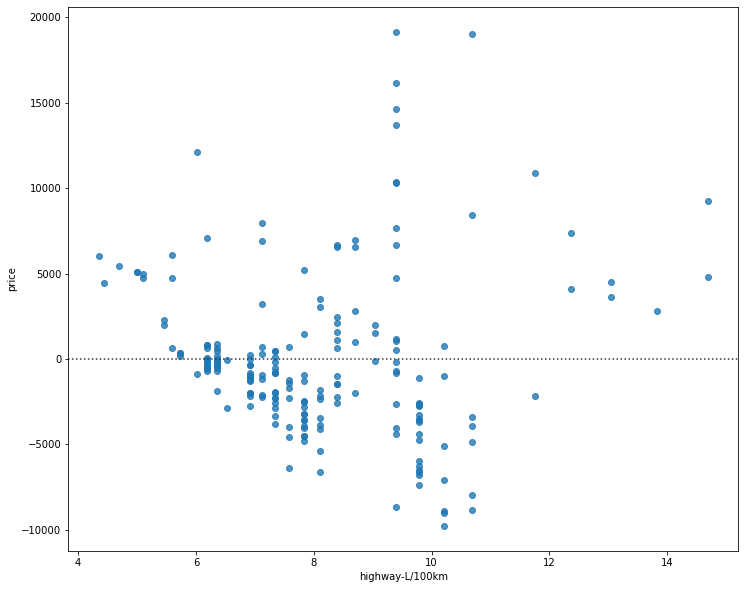

In [95]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-L/100km'], df['price'])
plt.show()

    ¿Qué nos dice esta trama?

Podemos ver en este gráfico de residuos que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.

    REGRESION LINEAL MULTIPLE
    
    ¿Cómo visualizamos un modelo de regresión lineal múltiple? Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual.

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

Primero, hagamos una predicción:

In [96]:
Z1 = df[['horsepower', 'curb-weight']]

#nota: originalmente la variable Z, contenia 4 valores, pero arrojo error:ValueError: matmul: el operando de entrada 1 no coincide en su dimensión central 0, con la firma gufunc (n?,k),(k,m?)->(n?,m?) (el tamaño 2 es diferente de 4)
#por lo que se cambio la variable Z por Z1 con dos valores de entrada .

In [97]:

Y_hat = lm.predict(Z1)

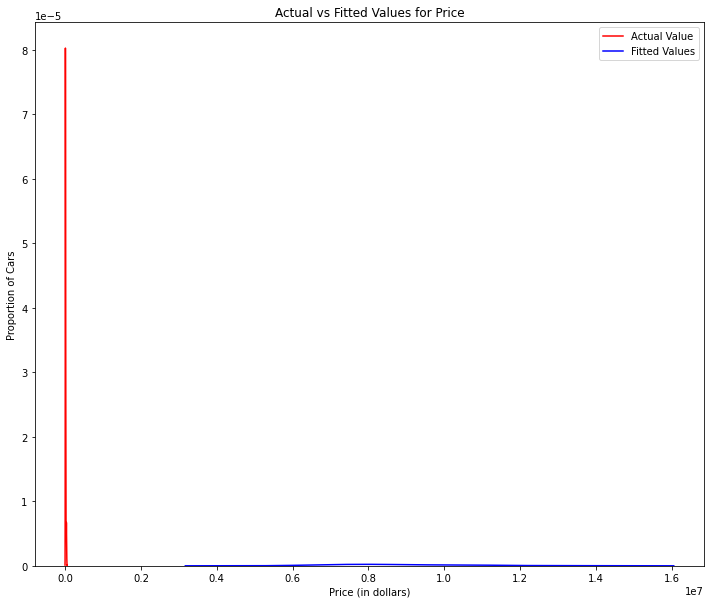

In [98]:
# en concecuencia de la nota anterior el grafico no es representativo. pero sirve de ejemplo.

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#no representativo por las notas anteriores#
#Podemos ver que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay algo de espacio para mejorar.

3. Regresión polinomial y canalizaciones (pipeline)
La regresión polinomial es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

Hay diferentes órdenes de regresión polinomial:
Cuadrático - 2do Orden
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2
Cúbico - 3er Orden
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3
Orden superior:
𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3....

Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al utilizar "mpg en carretera" como variable de predicción. Veamos si podemos intentar ajustar un modelo polinomial a los datos.

Usaremos la siguiente función para graficar los datos:


In [99]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Obtengamos las variables:

In [100]:
x = df['highway-L/100km']
y = df['price']

Ajustemos el polinomio usando la función polyfit, luego usemos la función poly1d para mostrar la función polinomial.

In [101]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


Grafiquemos la función:

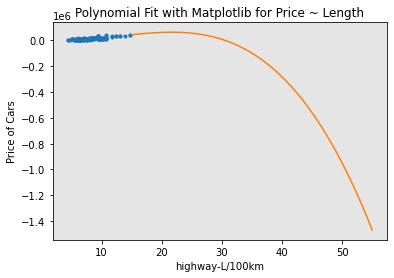

In [102]:
PlotPolly(p, x, y, 'highway-L/100km')

In [103]:
np.polyfit(x, y, 3)

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

Ya podemos ver en el gráfico que este modelo polinomial funciona mejor que el modelo lineal. Esto se debe a que la función polinomial generada "golpea" más puntos de datos.

          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


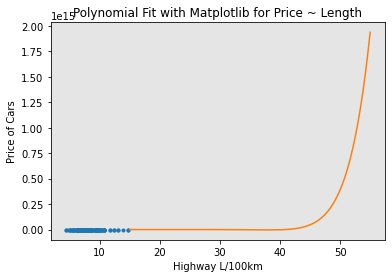

In [105]:
"""
Cree un modelo polinomial de 11 órdenes con las variables x e y de arriba.
"""
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway L/100km')

La expresión analítica para la función polinomial multivariante se complica. Por ejemplo, la expresión de un polinomio de segundo orden (grado=2) con dos variables viene dada por:

𝑌ℎ𝑎𝑡=𝑎+𝑏_1𝑋_1+𝑏_2𝑋_2+𝑏_3𝑋_1𝑋_2+𝑏_4𝑋_12+𝑏_5𝑋_22

Podemos realizar una transformación polinomial en múltiples características. Primero, importamos el módulo:

In [104]:
from sklearn.preprocessing import PolynomialFeatures

Creamos un objeto PolynomialFeatures de grado 2:

In [106]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [108]:
Z_pr=pr.fit_transform(Z)

En los datos originales, hay 201 muestras y 4 características.

In [109]:
Z.shape

(201, 4)

In [110]:
Z_pr.shape

(201, 15)

Pipeline (tuberia)

Las canalizaciones de datos simplifican los pasos para procesar los datos. Usamos el módulo Pipeline para crear un pipeline. También usamos StandardScaler como un paso en nuestra canalización.

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creamos el pipeline creando una lista de tuplas incluyendo el nombre del modelo o estimador y su constructor correspondiente

In [112]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Ingresamos la lista como un argumento para el constructor de la tubería:

In [113]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primero, convertimos el tipo de datos Z al tipo flotante para evitar las advertencias de conversión que pueden aparecer como resultado de que StandardScaler tome entradas flotantes.

Luego, podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.

In [114]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

De manera similar, podemos normalizar los datos, realizar una transformación y producir una predicción simultáneamente.

In [115]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

Cree una canalización que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo y.

In [116]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([14055.08612634, 14055.08612634, 18638.8884263 , 10758.2803759 ,
       16670.07025864, 14735.68505426, 15915.31383891, 16300.35587545,
       18610.89141407, 10974.48897133])

    4. Medidas para la evaluación dentro de la muestra
    
Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan preciso es el modelo.

Dos medidas muy importantes que se utilizan a menudo en Estadística para determinar la precisión de un modelo son:

     R^2 / R-cuadrado
     Error cuadrático medio (MSE)

R-cuadrado

R cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.

El valor de la R-cuadrado es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.

Error cuadrático medio (MSE)

El error cuadrático medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).
Modelo 1: Regresión lineal simple

Calculemos el R^2:

In [117]:
#highway_L/100km_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


Podemos decir que ~76.096% de la variación del precio se explica por este modelo lineal simple "horsepower_fit".

Calculemos el MSE:

Podemos predecir la salida, es decir, "yhat" usando el método de predicción, donde X es la variable de entrada:

In [118]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


Importemos la función mean_squared_error de las métricas del módulo:

In [119]:
from sklearn.metrics import mean_squared_error

Podemos comparar los resultados previstos con los resultados reales:

In [120]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


Modelo 2: Regresión lineal múltiple

Calculemos el R^2:

In [121]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8118115615344751


Podemos decir que ~81.1811 % de la variación del precio se explica por esta regresión lineal múltiple "multi_fit".

Calculemos el MSE.

Producimos una predicción:

In [122]:
Y_predict_multifit = lm.predict(Z)

Comparamos los resultados previstos con los resultados reales:

In [123]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11826072.956532082


Modelo 3: Ajuste polinomial

Calculemos el R^2.

Importemos la función r2_score de las métricas del módulo ya que estamos usando una función diferente.

In [124]:
from sklearn.metrics import r2_score

Aplicamos la función para obtener el valor de R^2:

In [125]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6753581660812171


Podemos decir que ~67.5358 % de la variación del precio se explica por este ajuste polinomial.

MSE

También podemos calcular el MSE:

In [126]:
mean_squared_error(df['price'], p(x))

20401030.180019405

5. Predicción y Toma de Decisiones
Predicción

En la sección anterior, entrenamos el modelo usando el método de ajuste. Ahora usaremos el método predict para producir una predicción. Permite importar pyplot para trazar; también usaremos algunas funciones de numpy.

In [127]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [128]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
ajustamos el modelo:

In [129]:
lm.fit(X, Y)
lm

LinearRegression()

Produce una prediccion:

In [130]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

Nosotros podemos trazar los datos:

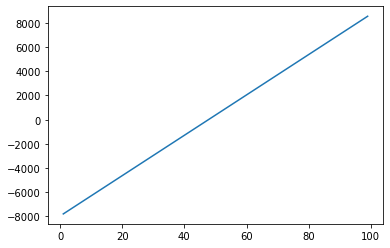

In [131]:
plt.plot(new_input, yhat)
plt.show()

    Toma de decisiones: determinación de un buen ajuste del modelo
 
Ahora que hemos visualizado los diferentes modelos y generado los valores R-cuadrado y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?

     ¿Cuál es un buen valor de R-cuadrado?

Al comparar modelos, el modelo con el valor R cuadrado más alto se ajusta mejor a los datos.

     ¿Qué es una buena MSE (Error cuadratico medio o Mean squared error)?

Al comparar modelos, el modelo con el valor MSE más pequeño se ajusta mejor a los datos.
Echemos un vistazo a los valores para los diferentes modelos.

Regresión lineal simple: uso de Highway-mpg como variable predictora del precio.

     R-cuadrado: 0,49659118843391759
     MSE: 3,16x10^7

Regresión lineal múltiple: uso de caballos de fuerza, peso en orden de marcha, tamaño del motor y mpg en carretera como variables predictoras del precio.

     R-cuadrado: 0.80896354913783497
     MSE: 1,2x10^7

Ajuste polinomial: Uso de Highway-mpg como variable predictora de precio.

     R-cuadrado: 0,6741946663906514
     MSE: 2,05 x 10^7
    

    Modelo de regresión lineal simple (SLR) frente a modelo de regresión lineal múltiple (MLR)
    
Por lo general, cuantas más variables tenga, mejor será su modelo para predecir, pero esto no siempre es cierto. En ocasiones, es posible que no tenga suficientes datos, que se encuentre con problemas numéricos o que muchas de las variables no sean útiles e incluso actúen como ruido. Como resultado, siempre debe verificar el MSE y el R^2.

Para comparar los resultados de los modelos MLR y SLR, observamos una combinación de R-squared y MSE para llegar a la mejor conclusión sobre el ajuste del modelo.

     MSE: El MSE de SLR es 3.16x10^7 mientras que MLR tiene un MSE de 1.2 x10^7. El MSE de MLR es mucho más pequeño.
     R-cuadrado: En este caso también podemos ver que hay una gran diferencia entre el R-cuadrado de la SLR y el R-cuadrado de la MLR. El R-cuadrado de la SLR (~0,497) es muy pequeño en comparación con el R-cuadrado de la MLR (~0,809).

Este R-cuadrado en combinación con el MSE muestra que MLR parece ser el mejor ajuste del modelo en este caso en comparación con SLR.
Más sobre el texto fuente
Se requiere el texto fuente para obtener información adicional sobre la traducción
Enviar comentarios
Paneles laterales



    Modelo lineal simple (SLR) frente a ajuste polinomial

MSE: Podemos ver que Polynomial Fit redujo el MSE, ya que este MSE es más pequeño que el de SLR.
     R-cuadrado: El R-cuadrado para Polynomial Fit es más grande que el R-cuadrado para SLR, por lo que Polynomial Fit también aumentó bastante el R-cuadrado.

Dado que el ajuste polinomial resultó en un MSE más bajo y un R-cuadrado más alto, podemos concluir que este fue un modelo de mejor ajuste que la regresión lineal simple para predecir el "precio" con "L/100km en carretera" como variable de predicción.

    Multiple Linear Regression (MLR) vs. Polynomial Fit
MSE: El MSE para MLR es más pequeño que el MSE para Polynomial Fit.
R-cuadrado: El R-cuadrado para el MLR también es mucho mayor que para el Ajuste polinomial.    
    

Conclusion:
Comparando estos tres modelos, concluimos que el modelo MLR es el mejor modelo para poder predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil.

Thank you for completing this lab!
Author

Joseph Santarcangelo
Traductor y correccion
Marcelo Reinoso

Other Contributors

Mahdi Noorian PhD

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

Fiorella Wenver

Yi Yao.
Change Log
Date (YYYY-MM-DD) 	Version 	Changed By 	Change Description
2020-10-30 	2.2 	Lakshmi 	Changed url of csv
2020-09-09 	2.1 	Lakshmi 	Fixes made in Polynomial Regression Equations
2020-08-27 	2.0 	Lavanya 	Moved lab to course repo in GitLab
© IBM Corporation 2020. All rights reserved. 